<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/RanForReg_Screentime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 1: Download dataset from KaggleHub
path = kagglehub.dataset_download("abhishekdave9/digital-habits-vs-mental-health-dataset")
print("Path to dataset files:", path)

100%|██████████| 546k/546k [00:00<00:00, 43.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abhishekdave9/digital-habits-vs-mental-health-dataset/versions/2


In [3]:
# Step 2: Load dataset
csv_file = os.path.join(path, "digital_habits_vs_mental_health.csv")
df = pd.read_csv(csv_file)

In [4]:
# Step 3: Preprocess Data
X = df.drop("sleep_hours", axis=1)
y = df["sleep_hours"]

# Encode categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Handle missing values
X = X.fillna(X.median(numeric_only=True))

In [5]:
# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Step 6: Evaluate model
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:\nMean Squared Error: {mse:.2f}\nR^2 Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error: 0.68
R^2 Score: 0.69


<ipython-input-8-1454324835>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")


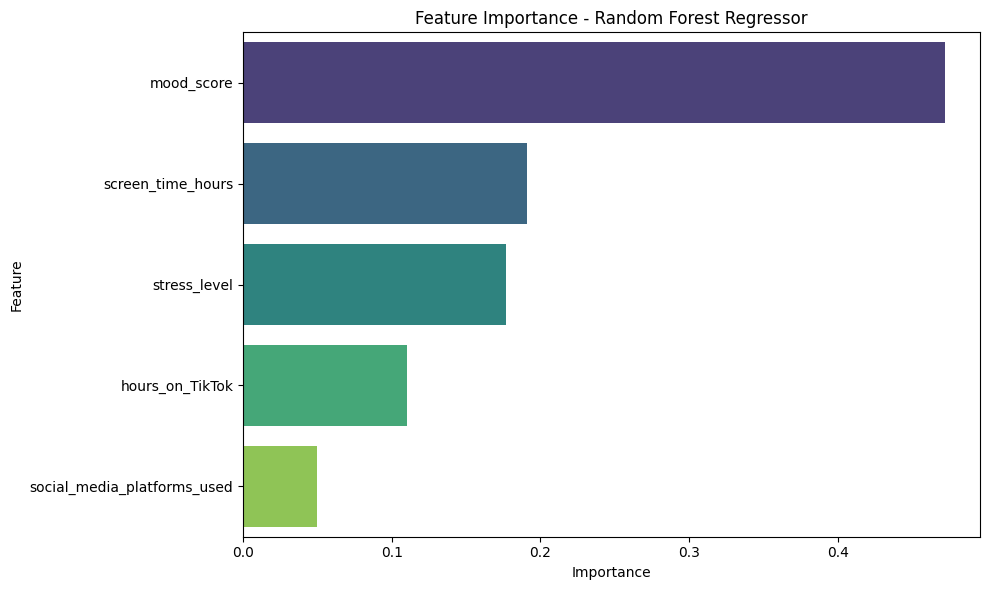

In [8]:
# Step 7: Feature Importance Visualization
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - Random Forest Regressor")
plt.tight_layout()
plt.show()